# 1. Import libraries


In [53]:
import kagglehub
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# 2. Download dataset


In [54]:
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")
data_path = os.path.join(path, "data")

with_mask_path = os.path.join(data_path, "with_mask")
without_mask_path = os.path.join(data_path, "without_mask")

Using Colab cache for faster access to the 'face-mask-dataset' dataset.


# 3. Convert images to numpy arrays

In [55]:
data = []
labels = []

# With mask images
for img_file in os.listdir(with_mask_path):
    img_path = os.path.join(with_mask_path, img_file)
    image = Image.open(img_path).resize((128,128)).convert('RGB')
    data.append(np.array(image))
    labels.append(1)

# Without mask images
for img_file in os.listdir(without_mask_path):
    img_path = os.path.join(without_mask_path, img_file)
    image = Image.open(img_path).resize((128,128)).convert('RGB')
    data.append(np.array(image))
    labels.append(0)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


# 4. Convert to numpy arrays

In [56]:
X = np.array(data, dtype='float32') / 255.0
Y = np.array(labels)

# 5. Split into train/test


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# 6. Build CNN


In [58]:
num_classes = 2

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 7. Compile


In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 8. Train


In [60]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=15)

Epoch 1/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7255 - loss: 0.5103 - val_accuracy: 0.9256 - val_loss: 0.2002
Epoch 2/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9236 - loss: 0.2216 - val_accuracy: 0.9587 - val_loss: 0.1178
Epoch 3/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9339 - loss: 0.1874 - val_accuracy: 0.9438 - val_loss: 0.1499
Epoch 4/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9377 - loss: 0.1588 - val_accuracy: 0.9620 - val_loss: 0.1546
Epoch 5/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9517 - loss: 0.1420 - val_accuracy: 0.9818 - val_loss: 0.0902
Epoch 6/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9582 - loss: 0.1188 - val_accuracy: 0.9587 - val_loss: 0.1311
Epoch 7/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9569 - loss: 0.1145 - val_accuracy: 0.9669 - val_loss: 0.1112
Epoch 8/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9718 - loss: 0.0944 - val_acc

# 9. Model Evaluation

In [61]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9540 - loss: 0.2248
Test Accuracy = 0.955658495426178


# 10. Plot training history


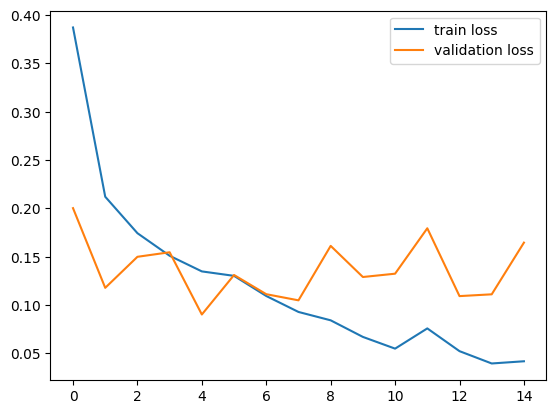

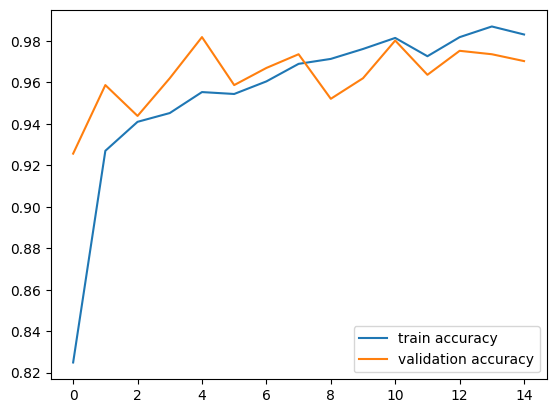

In [62]:
h = history

# Loss
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# 11. Predict on a new image

Choose input mode:
1 = predefined dataset image
2 = upload image(s)
Enter 1 or 2: 1
1 = with_mask    2 = without_mask
Enter 1 or 2: 2
Enter image number(s) separated by commas (e.g., 1,34): 1

File: without_mask_1.jpg


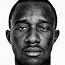

Expected: Not wearing mask
Predicted: Not wearing mask  (conf=1.000)



In [77]:
from google.colab import files
from google.colab.patches import cv2_imshow

# constants
IMAGE_SIZE = (128,128)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# ---------- helpers ----------
def preprocess_face_from_bgr(img_bgr, margin_ratio=0.12, image_size=IMAGE_SIZE):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    gray = cv2.equalizeHist(gray)

    faces = face_cascade.detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=3, minSize=(40,40)
    )

    if len(faces) == 0:
        # try relaxed parameters
        faces = face_cascade.detectMultiScale(
            gray, scaleFactor=1.01, minNeighbors=2, minSize=(30,30)
        )

    if len(faces) == 0:
        # Return None if no face found
        return None, None

    # Choose the largest face
    x, y, w, h = max(faces, key=lambda r: r[2]*r[3])
    m = int(margin_ratio * max(w, h))
    x1, y1 = max(0, x - m), max(0, y - m)
    x2, y2 = min(img_rgb.shape[1], x + w + m), min(img_rgb.shape[0], y + h + m)

    face_rgb = img_rgb[y1:y2, x1:x2]
    face_display = cv2.cvtColor(face_rgb, cv2.COLOR_RGB2BGR)
    face_resized = cv2.resize(face_rgb, image_size)
    face_input = np.expand_dims(face_resized.astype('float32') / 255.0, axis=0)

    return face_input, face_display

# run calibration once
label_map = {0: "Not wearing mask", 1: "Wearing mask"}

def predict_and_show(img_bgr, expected=None):
    face_input, face_display = preprocess_face_from_bgr(img_bgr)
    if face_input is None:
        print("No face detected!")
        return None, None
    probs = model.predict(face_input, verbose=0)[0]
    idx = int(np.argmax(probs))
    pred_label = label_map[idx]
    conf = probs[idx]
    cv2_imshow(face_display)
    if expected:
        print("Expected:", expected)
    print(f"Predicted: {pred_label}  (conf={conf:.3f})\n")
    return pred_label, conf

# ---------- interactive mode ----------
print("Choose input mode:\n1 = predefined dataset image\n2 = upload image(s)")
mode = input("Enter 1 or 2: ").strip()

if mode == "1":
    print("1 = with_mask    2 = without_mask")
    cat = input("Enter 1 or 2: ").strip()
    folder = with_mask_path if cat == "1" else without_mask_path
    expected = "Wearing mask" if cat == "1" else "Not wearing mask"
    nums = input("Enter image number(s) separated by commas (e.g., 1,34): ")
    for n in [x.strip() for x in nums.split(",") if x.strip()]:
        img_file = f"{'with_mask_' if cat=='1' else 'without_mask_'}{n}.jpg"
        p = os.path.join(folder, img_file)
        img = cv2.imread(p)
        if img is None:
            print("Not found:", p); continue
        print("\nFile:", img_file)
        predict_and_show(img, expected=expected)

elif mode == "2":
    uploaded = files.upload()
    for name in uploaded .keys():
        img = cv2.imread(name)
        if img is None:
            print("Cannot read:", name); continue
        print("\nUploaded:", name)
        predict_and_show(img)

else:
    print("Invalid choice")
